In [1]:
import os
import cv2

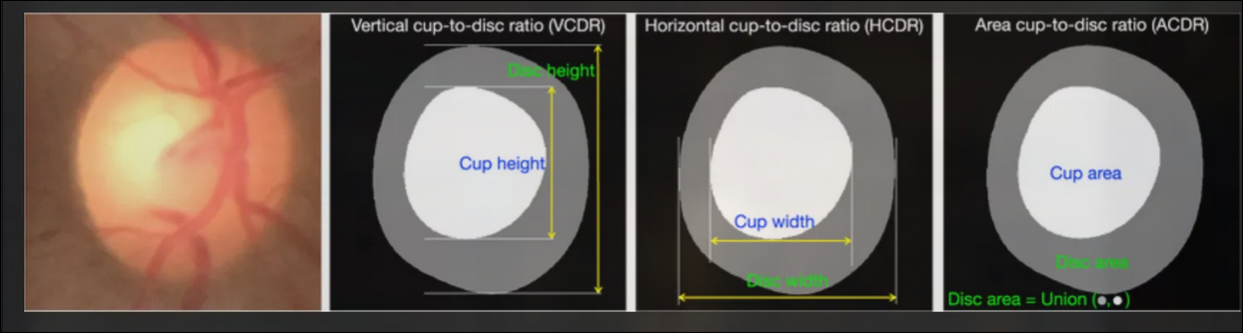

Total Images: 50
                                                file      type
0  ./Dataset_glaucoma/Train_data/Training/Images/...  GLAUCOMA
1  ./Dataset_glaucoma/Train_data/Training/Images/...  GLAUCOMA
2  ./Dataset_glaucoma/Train_data/Training/Images/...  GLAUCOMA
3  ./Dataset_glaucoma/Train_data/Training/Images/...  GLAUCOMA
4  ./Dataset_glaucoma/Train_data/Training/Images/...  GLAUCOMA


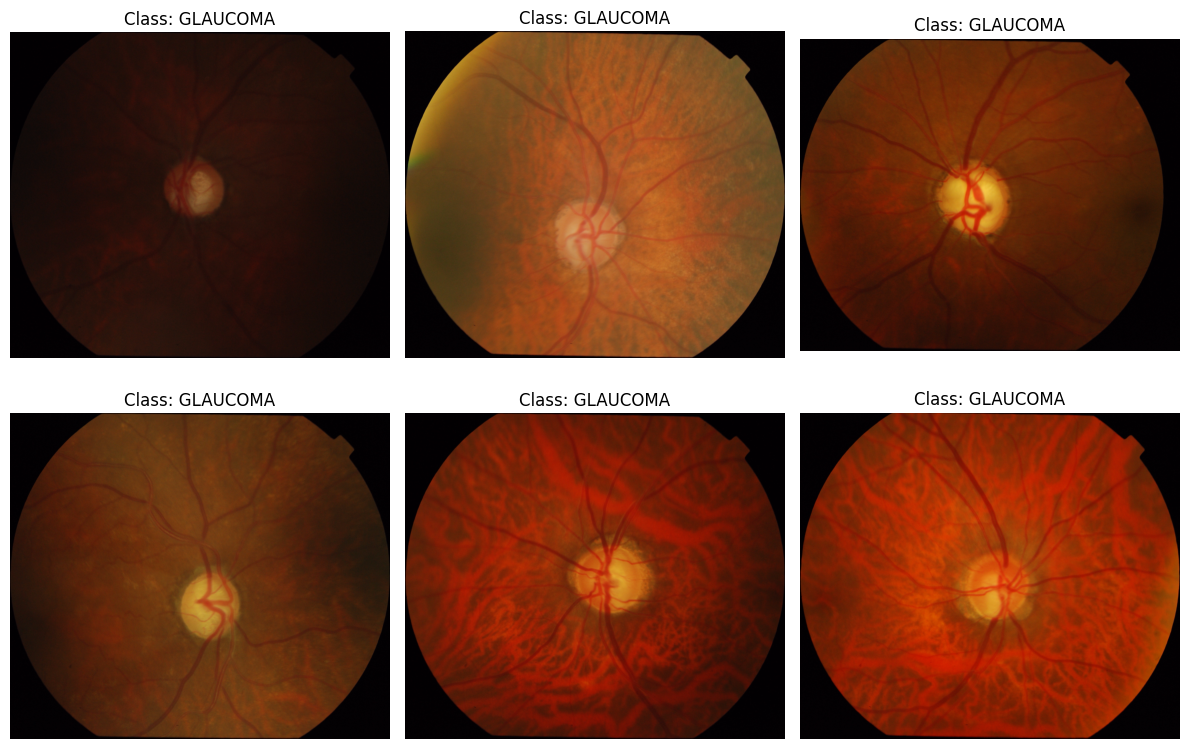

In [2]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2  # To read images

# Define the root directory
root = './Dataset_glaucoma/Train_data/Training/Images/'
data = []

# Traverse through the folders
for class_ in os.listdir(root):
    class_path = os.path.join(root, class_)  # Use os.path.join for proper file path handling
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        data.append({'file': image_path, 'type': class_})

# Create a DataFrame
data_df = pd.DataFrame(data)

# Display the number of images
print(f"Total Images: {len(data_df)}")

# Display the first few rows of the DataFrame
print(data_df.head())

# Visualize a few images with matplotlib
def visualize_images(data_df, num_images=6):
    plt.figure(figsize=(12, 8))
    
    for i in range(num_images):
        image_path = data_df.iloc[i]['file']
        label = data_df.iloc[i]['type']
        
        # Read the image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
        
        # Plot the image
        plt.subplot(2, 3, i+1)  # 2 rows, 3 columns
        plt.imshow(image)
        plt.title(f"Class: {label}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to visualize
visualize_images(data_df)



      Class  Num_Images
0  GLAUCOMA          32
1    NORMAL          18


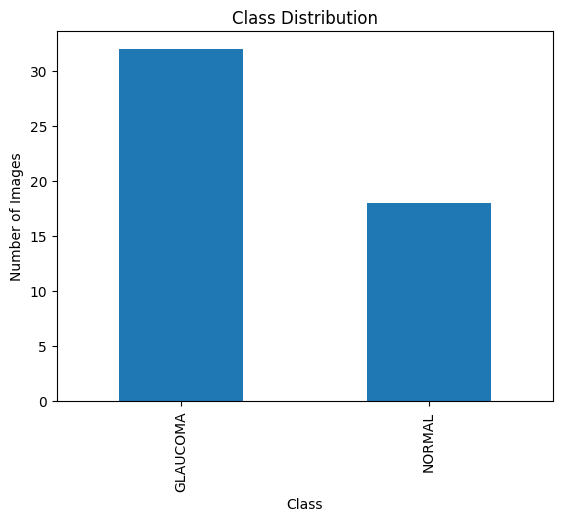

In [3]:

root_dir = "./Dataset_glaucoma/Train_data/Training/Images/"

data = []
for class_name in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        data.append({"Class": class_name, "Num_Images": num_images})

class_distribution = pd.DataFrame(data)

print(class_distribution)
class_distribution.plot(kind='bar', x='Class', y='Num_Images', legend=False, title="Class Distribution")
plt.ylabel("Number of Images")
plt.show()


#### why histogram equilization expalin it in detail why it is useful --> to improve the contrast in an image 

- why to convert to grey scale beacuse it contains only the intensity information
- Histogram equalization is used for the image enhancement   -> it is the representation of the freqency of occurence of the different grey levels
- to get a high quality image the pixels should be distributed throughout

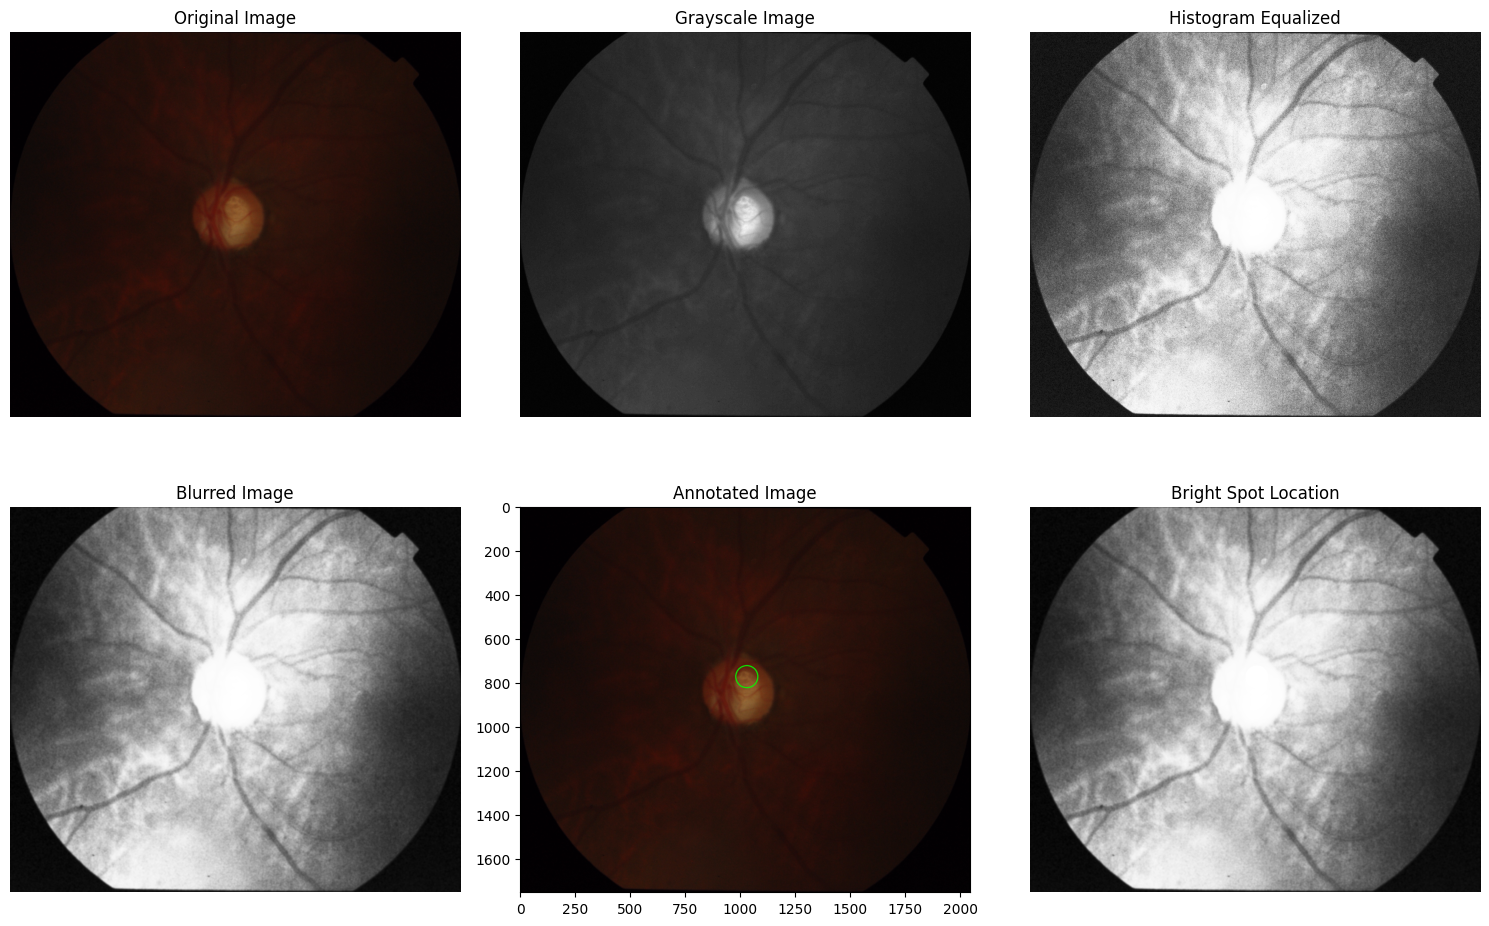

In [14]:
def detect_optic_disc_and_cup_with_visualization(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading image: {image_path}")
        return None

    # Step 1: Grayscale Conversion
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Histogram Equalization
    gray_eq = cv2.equalizeHist(gray)

    # Step 3: Gaussian Blur
    blurred = cv2.GaussianBlur(gray_eq, (15, 15), 0)

    # Step 4: Bright Spot Detection
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(blurred)

    # Visualize each step
    plt.figure(figsize=(15, 10))
    
    # Original image
    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    # Grayscale image
    plt.subplot(2, 3, 2)
    plt.title("Grayscale Image")
    plt.imshow(gray, cmap='gray')
    plt.axis('off')
    
    # Histogram equalized image
    plt.subplot(2, 3, 3)
    plt.title("Histogram Equalized")
    plt.imshow(gray_eq, cmap='gray')
    plt.axis('off')
    
    # Blurred image
    plt.subplot(2, 3, 4)
    plt.title("Blurred Image")
    plt.imshow(blurred,cmap='gray')
    plt.axis('off')
    
    # Annotated image
    annotated_image = image.copy()
    od_x, od_y = max_loc
    cv2.circle(annotated_image, (od_x, od_y), 50, (0, 255, 0), 3)
    plt.subplot(2, 3, 5)
    plt.title("Annotated Image")
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('on')
    
    # Highlight max location
    plt.subplot(2, 3, 6)
    plt.title("Bright Spot Location")
    bright_spot_image = blurred.copy()
    cv2.circle(bright_spot_image, max_loc, 50, 255, -1)
    plt.imshow(bright_spot_image, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Example usage
root_dir = './Dataset_glaucoma/Train_data/Training/Images/GLAUCOMA/'  # Adjust based on directory
images = [os.path.join(root_dir, img) for img in os.listdir(root_dir) if img.endswith('.png')]

# Process the first image
if images:
        detect_optic_disc_and_cup_with_visualization(images[0])
else:
    print("No images found in the directory.")
   


# drawing in an annotated image with the fixed circle shape in this case it is 50 

The min/max values and their locations: Min Value = 14.0, Max Value = 255.0, Min Location = (0, 134), Max Location = (1028, 774)


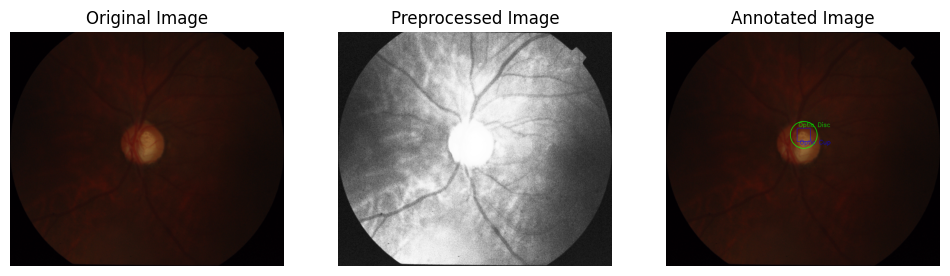

The min/max values and their locations: Min Value = 13.0, Max Value = 255.0, Min Location = (2047, 200), Max Location = (914, 1027)


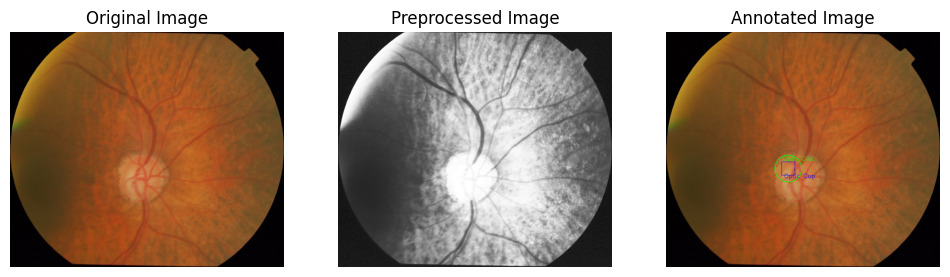

The min/max values and their locations: Min Value = 18.0, Max Value = 255.0, Min Location = (1634, 0), Max Location = (1034, 805)


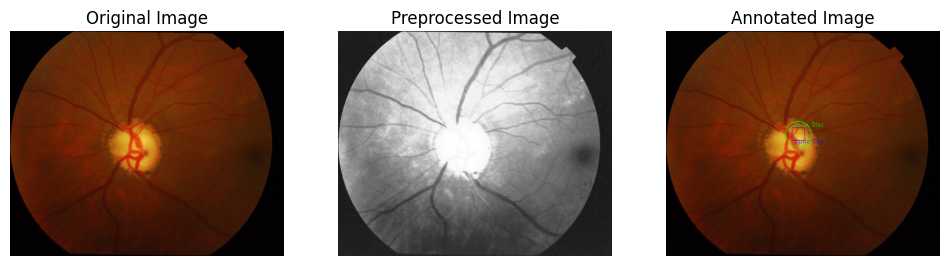

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def detect_optic_disc_and_cup(image_path):
    #1.Read the image , and then it stores in BGR format it, this cannot be read by matplotlib
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading image: {image_path}")
        return None

    # Convert RGB to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #  Preprocessing (histogram equalization)
    gray_eq = cv2.equalizeHist(gray)
    
    # Apply Gaussian blur to reduce the noise ,
    blurred = cv2.GaussianBlur(gray_eq, (15, 15), 0)
    
    # 3: Bright spot detection and 
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(blurred)
    print(f"The min/max values and their locations: Min Value = {min_val}, Max Value = {max_val}, Min Location = {min_loc}, Max Location = {max_loc}")

    # Optic disc location (brightest spot)
    od_x, od_y = max_loc
    
    # Draw a circle around the optic disc
    annotated_image = image.copy()
    #cv2.circle(image, center_coordinates, radius, color, thickness)
    cv2.circle(annotated_image, (od_x, od_y),100, (0, 255, 0), 3)
    #in the the cv2.putText(img, text, org, font, fontScale, color, thickness, lineType=None)
    cv2.putText(annotated_image, "Optic Disc", (od_x - 40, od_y - 60), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)
    
    # Step 4: Optic cup detection
    # Threshold within the region of interest (ROI around the optic disc)
    roi = gray_eq[od_y-50:od_y+50, od_x-50:od_x+50]
    # 200 is the threshold value where the the intensity is >200 - categorize it as optic cup and then others to background
    _, cup_mask = cv2.threshold(roi, 200, 255, cv2.THRESH_BINARY)
    
    # Find contours in the cup mask
    contours, _ = cv2.findContours(cup_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        # Draw contours on the original image (offset by ROI position)
        cv2.drawContours(annotated_image, [cnt + [od_x-50, od_y-50]], -1, (255, 0, 0), 2)
        cv2.putText(annotated_image, "Optic Cup", (od_x - 30, od_y + 70), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 2)
    
    # Step 5: Visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title("Preprocessed Image")
    plt.imshow(gray_eq, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title("Annotated Image")
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.show()

# Example usage
root_dir = './Dataset_glaucoma/Train_data/Training/Images/GLAUCOMA/'  # Adjust based on directory
images = [os.path.join(root_dir, img) for img in os.listdir(root_dir) if img.endswith('.png')]

# Process the first image
if images:
    for i in range(3):
        detect_optic_disc_and_cup(images[i])
else:
    print("No images found in the directory.")
   


# Dynamic marking of the Optic Disk

https://towardsdatascience.com/implementing-a-connected-component-labeling-algorithm-from-scratch-94e1636554f

The min/max values and their locations: Min Value = 14.0, Max Value = 255.0, Min Location = (0, 134), Max Location = (1028, 774)


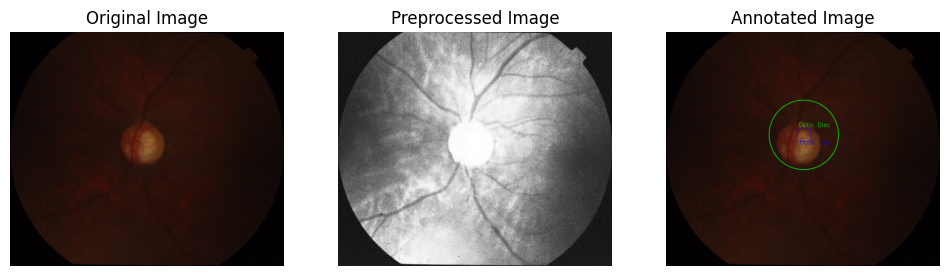

The min/max values and their locations: Min Value = 13.0, Max Value = 255.0, Min Location = (2047, 200), Max Location = (914, 1027)


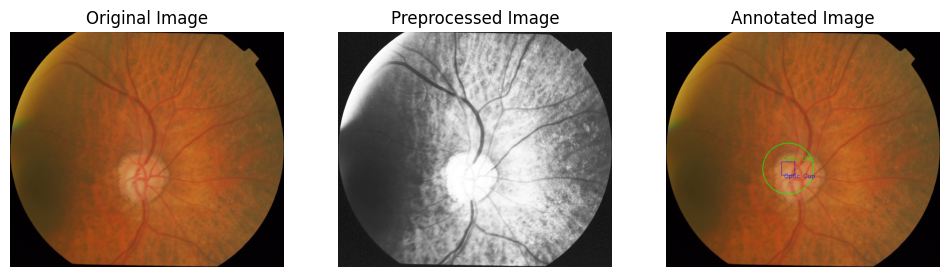

The min/max values and their locations: Min Value = 18.0, Max Value = 255.0, Min Location = (1634, 0), Max Location = (1034, 805)


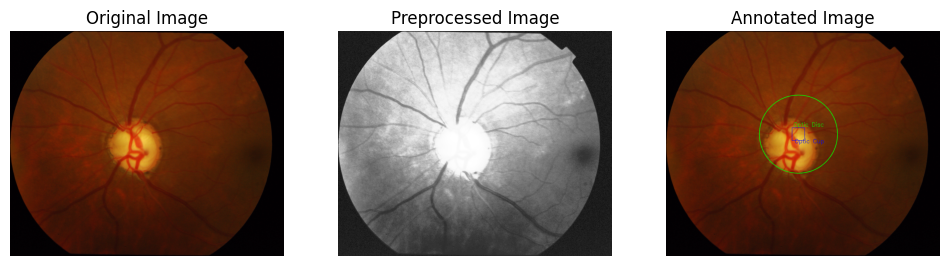

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import measure

def detect_optic_disc_and_cup(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading image: {image_path}")
        return None

    # Convert to grayscale and preprocess
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_eq = cv2.equalizeHist(gray)
    blurred = cv2.GaussianBlur(gray_eq, (15, 15), 0)

    # Bright spot detection
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(blurred)
    print(f"The min/max values and their locations: Min Value = {min_val}, Max Value = {max_val}, Min Location = {min_loc}, Max Location = {max_loc}")
    od_x, od_y = max_loc

    # Calculate optic disc size dynamically using connected components
    mask = np.zeros_like(gray_eq)
    mask[blurred >= max_val * 0.9] = 255  # Threshold to isolate the brightest region
    labels = measure.label(mask, connectivity=2, background=0)
    unique_labels, counts = np.unique(labels, return_counts=True)

    # Find the label of the brightest region
    brightest_label = labels[od_y, od_x]
    brightest_region_size = counts[brightest_label]  # Size of the optic disc region
    radius = int(np.sqrt(brightest_region_size / np.pi))  # Calculate radius from the area

    # Annotate the optic disc
    annotated_image = image.copy()
    cv2.circle(annotated_image, (od_x, od_y), radius, (0, 255, 0), 3)
    cv2.putText(annotated_image, "Optic Disc", (od_x - 40, od_y - 60), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)

    # Threshold within the ROI for optic cup detection
    roi = gray_eq[max(od_y - 50, 0):min(od_y + 50, gray_eq.shape[0]),
                  max(od_x - 50, 0):min(od_x + 50, gray_eq.shape[1])]
    _, cup_mask = cv2.threshold(roi, 200, 255, cv2.THRESH_BINARY)

    # Find contours in the cup mask
    contours, _ = cv2.findContours(cup_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        cv2.drawContours(annotated_image, [cnt + [od_x - 50, od_y - 50]], -1, (255, 0, 0), 2)
        cv2.putText(annotated_image, "Optic Cup", (od_x - 30, od_y + 70), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 2)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Preprocessed Image")
    plt.imshow(gray_eq, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Annotated Image")
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

# Example usage
root_dir = './Dataset_glaucoma/Train_data/Training/Images/GLAUCOMA/'  # Adjust based on directory
images = [os.path.join(root_dir, img) for img in os.listdir(root_dir) if img.endswith('.png')]

if images:
    for i in range(3):
        detect_optic_disc_and_cup(images[i])
else:
    print("No images found in the directory.")


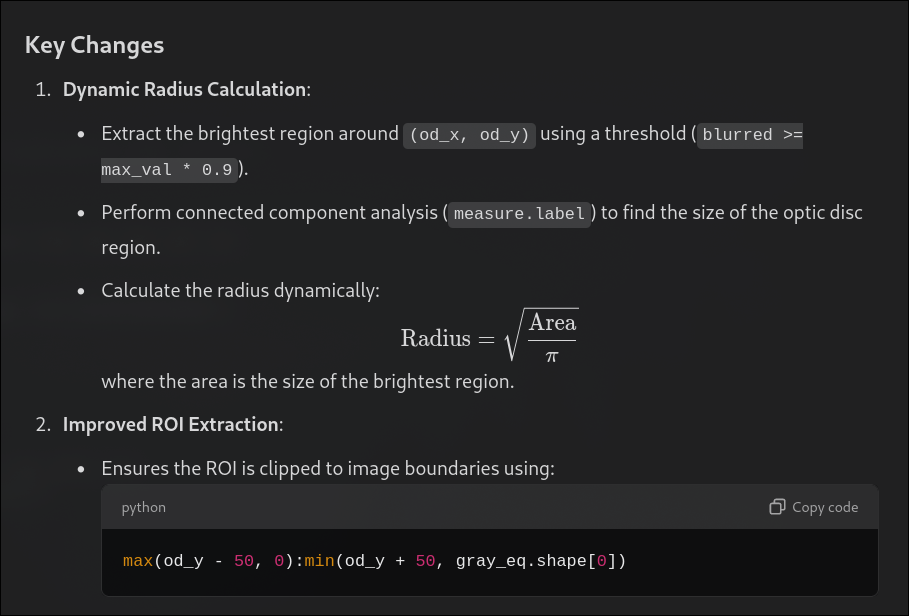

# fixed radius for the opti disc 

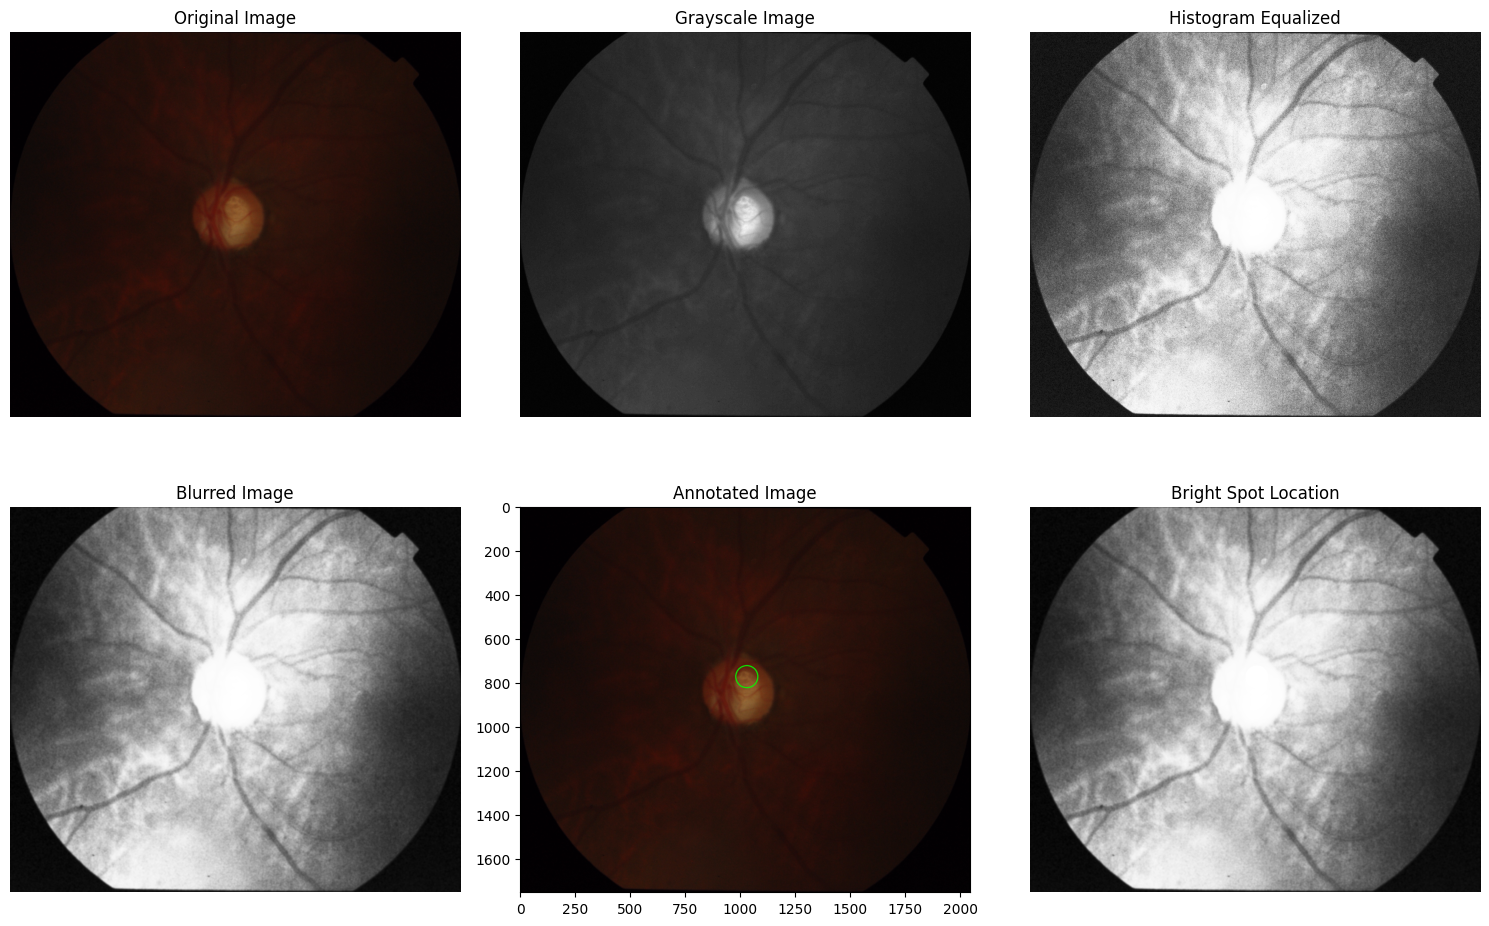